In [1]:
import warnings
warnings.filterwarnings("ignore")

# KNeighborsClassifier

In [3]:
from sklearn import datasets,neighbors
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
import numpy as np
# 加载 scikit-learn 自带的 digits 数据集
digits=datasets.load_digits() 
#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,
                                               test_size=0.25,random_state=0,stratify=digits.target) 
# 测试 KNeighborsClassifier 的用法
def test_KNeighborsClassifier(*data):
    X_train,X_test,y_train,y_test=data
    clf=neighbors.KNeighborsClassifier()
    clf.fit(X_train,y_train)
    print("Training Score:%f"%clf.score(X_train,y_train))
    print("Testing Score:%f"%clf.score(X_test,y_test))
test_KNeighborsClassifier(X_train,X_test,y_train,y_test)

Training Score:0.991091
Testing Score:0.980000


In [4]:
clf=neighbors.KNeighborsClassifier()
??clf

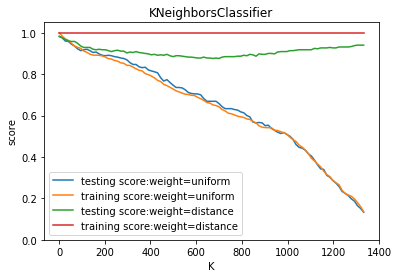

In [5]:
# 测试 KNeighborsClassifier 中 n_neighbors 和 weights 参数的影响
def test_KNeighborsClassifier_k_w(*data):
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights=['uniform','distance']

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 weights 下， 预测得分随 n_neighbors 的曲线
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(weights=weight,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_test,y_test))
            training_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()
test_KNeighborsClassifier_k_w(X_train,X_test,y_train,y_test)

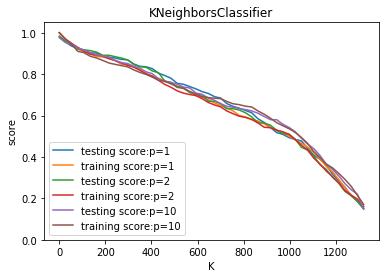

In [6]:
# 测试 KNeighborsClassifier 中 n_neighbors 和 p 参数的影响
def test_KNeighborsClassifier_k_p(*data):
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,endpoint=False,dtype='int')
    Ps=[1,2,10]

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 p 下， 预测得分随 n_neighbors 的曲线
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(p=P,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_test,y_test))
            training_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:p=%d"%P)
        ax.plot(Ks,training_scores,label="training score:p=%d"%P)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()
test_KNeighborsClassifier_k_p(X_train,X_test,y_train,y_test)

# KNeighborsRegressor

In [10]:
# 创建回归模型使用的数据集
n=1000
X =5 * np.random.rand(n, 1)
y = np.sin(X).ravel()
# 每隔 5 个样本就在样本的值上添加噪音
y[::5] += 1 * (0.5 - np.random.rand(int(n/5))) 
# 进行简单拆分，测试集大小占 1/4
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.25,random_state=0)
# 测试 KNeighborsRegressor 的用法
def test_KNeighborsRegressor(*data):
    X_train,X_test,y_train,y_test=data
    regr=neighbors.KNeighborsRegressor()
    regr.fit(X_train,y_train)
    print("Training Score:%f"%regr.score(X_train,y_train))
    print("Testing Score:%f"%regr.score(X_test,y_test))
test_KNeighborsRegressor(X_train,X_test,y_train,y_test)

Training Score:0.974779
Testing Score:0.955806


In [12]:
regr=neighbors.KNeighborsRegressor()
??regr

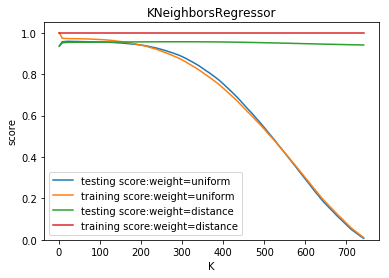

In [13]:
# 测试 KNeighborsRegressor 中 n_neighbors 和 weights 参数的影响
def test_KNeighborsRegressor_k_w(*data):
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights=['uniform','distance']

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 weights 下， 预测得分随 n_neighbors 的曲线
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(weights=weight,n_neighbors=K)
            regr.fit(X_train,y_train)
            testing_scores.append(regr.score(X_test,y_test))
            training_scores.append(regr.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()
test_KNeighborsRegressor_k_w(X_train,X_test,y_train,y_test)

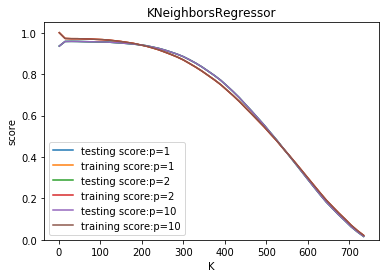

In [14]:
# 测试 KNeighborsRegressor 中 n_neighbors 和 p 参数的影响
def test_KNeighborsRegressor_k_p(*data):
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,endpoint=False,dtype='int')
    Ps=[1,2,10]

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 p 下， 预测得分随 n_neighbors 的曲线
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(p=P,n_neighbors=K)
            regr.fit(X_train,y_train)
            testing_scores.append(regr.score(X_test,y_test))
            training_scores.append(regr.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:p=%d"%P)
        ax.plot(Ks,training_scores,label="training score:p=%d"%P)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()
test_KNeighborsRegressor_k_p(X_train,X_test,y_train,y_test)